Seeding the environment

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

In [2]:
# Set seed value
seed_value = 56
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)
# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)
# 4. Set `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)
# 5. Configure a new global `tensorflow` session
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

# Libraries

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import random

In [4]:
import umint
import autoencoder as ae

# Importing Data

In [5]:
dir = 'E:/UMINTv2/Data/preprocessedData/bmcite30k/'
dir1 = 'E:/UMINTv2/Labels/bmcite30k/'
rna = pd.read_csv(dir+'bmcite30k_rna_scaled.csv',header = 0 , index_col= 0)
adt = pd.read_csv(dir+'bmcite30k_adt_scaled.csv',header = 0 , index_col= 0)
labels = pd.read_csv(dir1+'bmcite30k_groundTruth.csv',header = 0 , index_col= 0)

x1 = rna.T
x2 = adt.T

## Proposed UMINT architecture
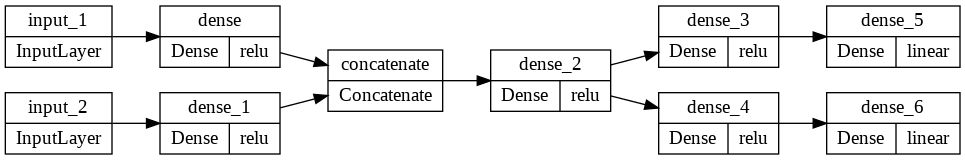

# UMINT embedding

In [8]:
x1_train, x1_test, x2_train, x2_test = train_test_split(x1, x2, test_size=0.2, random_state=83)
#UMINT
MyEncoder, MyAE = umint.CombinedEncoder([x1_train, x2_train], [x1_test, x2_test], [128, 10], 64, 98, 0.0001, 0.001, 25, 16)
low = MyEncoder.predict([x1, x2])

In [ ]:
#pd.DataFrame(low).to_csv('E:/UMINTv2/Data/Embedding/bmcite30k_UMINT_embedding.csv')